In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding

In [10]:
train=pd.read_csv("C:/Users/ricar/OneDrive/Documents/5th Year - HonoursMasters/COS 711/Assignment 3/Train.csv")
test=pd.read_csv("C:/Users/ricar/OneDrive/Documents/5th Year - HonoursMasters/COS 711/Assignment 3/Test.csv")

# split train dataset into train \ test : 75% \ 25%
train = train[:11654:]
test = train[:3885]

train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [11]:
def replace_data(ts):
    ts = ts.replace("nan","-10**3").split(",") # NANs replaced with value differnt from all input values
    replaced_ts = np.array([float(t) for t in ts])
    return replaced_ts

def extract_time_series(df, feat_name):
    return np.array(df[feat_name].apply(lambda ts: parse_ts_data(ts)).tolist())

import matplotlib.pyplot as plt
for i in range(len(train)):
    if train['location'][i] == 'A':
        train['location'][i] = 0
    elif train['location'][i] == 'B':
        train['location'][i] = 1
    elif train['location'][i] == 'C':
        train['location'][i] = 2
    elif train['location'][i] == 'D':
        train['location'][i] = 3
    elif train['location'][i] == 'E':
        train['location'][i] = 4
        
feat_name_arr = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']

# Transform training data
train_time_series_feat = np.array([extract_time_series(train, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of training data:', train_time_series_feat.shape)

# Transform test data
test_time_series_feat = np.array([extract_time_series(test, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of test data:', test_time_series_feat.shape)

D:\Anaconda Installation\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda Installation\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda Installation\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda Installation\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A valu

Shape of training data: (11654, 121, 6)
Shape of test data: (3885, 121, 6)


(Text(0.5, 0, 'PM2.5'), Text(0, 0.5, 'No. of samples'))

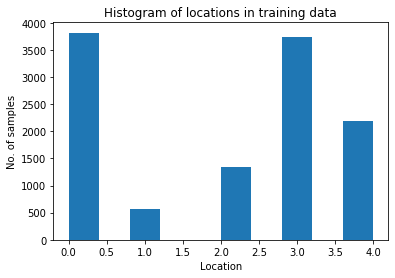

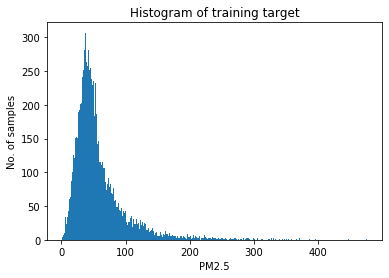

In [12]:
import matplotlib.pyplot as plt
# Location plot

plt.figure(1)
plt.hist(train['location'])
plt.title('Histogram of locations in training data')
plt.xlabel('Location'), plt.ylabel('No. of samples')

# target plot
train_target = train['target'].values.astype(np.float32)

plt.figure(2)
plt.hist(train_target,bins=400)
plt.title('Histogram of training target')
plt.xlabel('PM2.5'), plt.ylabel('No. of samples')

#### Normalization

In [25]:
time_series_feat = np.concatenate([train_time_series_feat, test_time_series_feat], axis = 0)

# data standardization
for c in range(time_series_feat.shape[2]):
    valid_idx = np.where(time_series_feat[:,:,c] != -10**3) # Does not include missing values
    mean = time_series_feat[:,:,c][valid_idx].mean()
    std = time_series_feat[:,:,c][valid_idx].std()
    
    time_series_feat[:,:,c][valid_idx] -= mean
    time_series_feat[:,:,c][valid_idx] /= std

train_time_series_feat = time_series_feat[:train['location'].shape[0]]
test_time_series_feat = time_series_feat[train['location'].shape[0]:]

print('shape of train', np.shape(train_time_series_feat))

train_X = train_time_series_feat.reshape(-1,121,6)
test_X = test_time_series_feat.reshape(-1,121,6)
train_X.shape, test_X.shape

shape of train (11654, 121, 6)


((11654, 121, 6), (3885, 121, 6))

#### Splitting Train set into train and validation

In [26]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train['target'], test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((9323, 121, 6), (2331, 121, 6), (9323,), (2331,))

In [27]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[2], train_X.shape[1])
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[2], valid_X.shape[1])
train_X.shape, valid_X.shape,train_label.shape,valid_label.shape

((9323, 6, 121), (2331, 6, 121), (9323,), (2331,))

## LSTM Model

In [28]:
model = Sequential()
model.add (LSTM(128, activation='relu', dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(6,121)))
model.add(LSTM(64, activation='relu', dropout=0.3, recurrent_dropout=0.2,))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss ='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 6, 128)            128000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 181,633
Trainable params: 181,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 50

model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

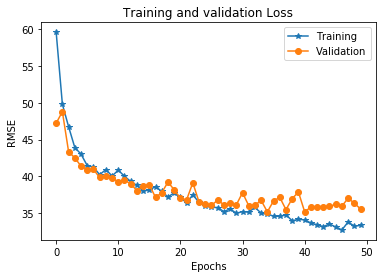

In [92]:
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

mse_loss = np.sqrt(loss)
mse_val_loss = np.sqrt(val_loss)
plt.figure(1)
plt.plot(np.arange(epochs), mse_loss, '*-', label = 'Training')
plt.plot(np.arange(epochs), mse_val_loss, 'o-', label = 'Validation')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

In [95]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2], test_X.shape[1])

### Model Evaluation on Test Set

In [96]:
test_eval = model.evaluate(test_X, test['target'], verbose=1)
print('RMSE of Test',np.sqrt(test_eval))

3885/3885 [==============================] - 1s 282us/step
RMSE of Test 30.123327013018713


## Prediction

In [97]:
y_pred = model.predict(test_X)

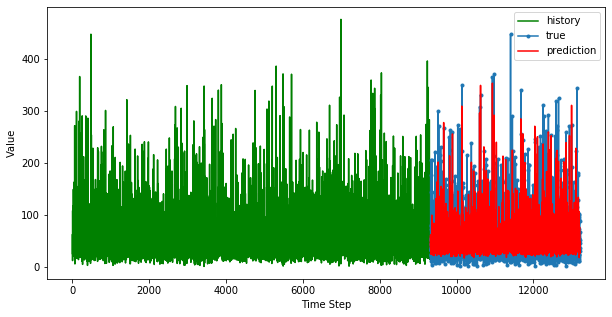

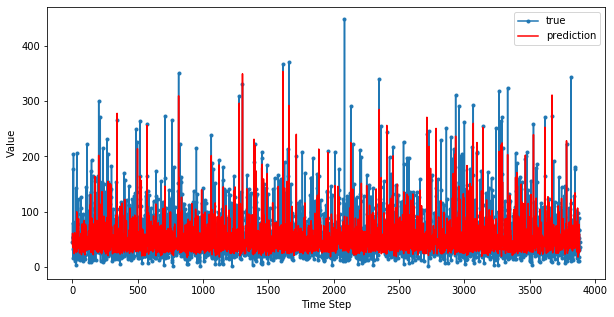

In [98]:
plt.figure(1, figsize = (10,5))
plt.plot(np.arange(0, len(train_label)),train_label, 'g', label="history")
plt.plot(np.arange(len(train_label), len(train_label) + len(test['target'])), test['target'], marker='.', label="true")
plt.plot(np.arange(len(train_label), len(train_label) + len(test['target'])), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

plt.figure(2, figsize = (10,5))
plt.plot(test['target'], marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()